In [1]:
import os

# import numpy as np

from detector_testing_system.characteristic.bias import calculate_bias, research_bias
from detector_testing_system.data import load_data
# from detector_testing_system.device import run_device
# from detector_testing_system.experiment import ExperimentConfig, run_experiment
from detector_testing_system.output import Output

In [2]:
LABEL = 'C22H052'
THRESHOLD = 40


In [3]:
# config = ExperimentConfig.from_ini(
#     filepath=os.path.join('.', 'ini', f'{LABEL}.ini'),
# )

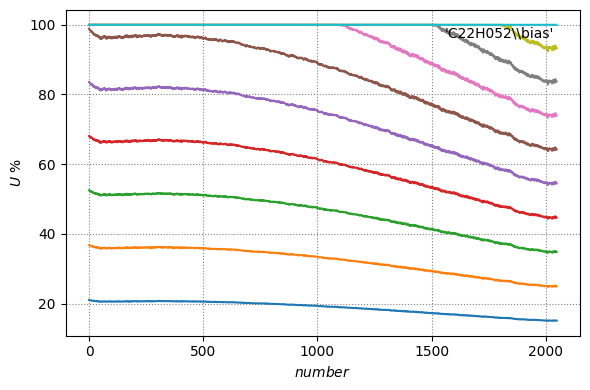

In [4]:
# device = run_device(
#     config=config,
# )
# run_experiment(
#     device=device,
#     config=config,
#     params=[
#         (100, np.arange(5, 50+5, 5)),
#     ],
#     label=label,
#     force=True,
# )

data = load_data(
    label=os.path.join(LABEL, 'bias'),
    show=True,
)

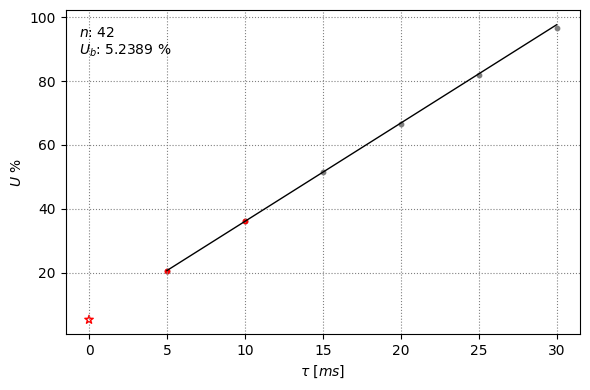

In [5]:
bias = calculate_bias(
    output=Output.create(data=data, n=42),
    threshold=THRESHOLD,
    show=True,
)

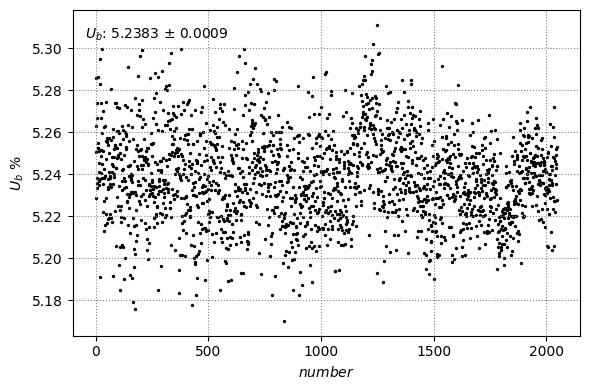

In [6]:
bias = research_bias(
    data=data,
    threshold=THRESHOLD,
    show=True,
)